## Task 1 
Dataset Downloaded and IPython Notebook Named Titanic Created Using Jupyter Notebook. 

In [114]:
#Import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline 

In [153]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Task 2
Dataset going to load into pandas dataframe and display first 10 rows. 

In [11]:
#Loading Titanic train dataset into pandas dataframe
file_path = 'F:/Data Science/Dhokkho/titanic/train.csv'
df = pd.read_csv(file_path)

In [15]:
#Display First 10 Rows 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Task 3 
Data Cleaning

In [18]:
#Checking the shape of the dataset to understand its size (rows, columns)
df.shape

(891, 12)

In [20]:
## Get a quick overview of the dataset's structure and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Task 3.1 Identify and handle missing values 

In [23]:
#Identifying the columns with missing values by counting nulls in each column
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
# Replace missing values in the 'Age' column with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())
# Fill missing values in the 'Embarked' column with the mode of that column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [27]:
 # Drop 'Cabin' due to high percentage of missing values
df = df.drop('Cabin', axis=1)


In [40]:
missing_values = df.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
df.shape

(891, 11)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Task 3.2 Remove Duplicates

In [49]:
# 2. Remove duplicate rows
df.drop_duplicates(inplace=True)

In [51]:
df.shape

(891, 11)

#### Task 3.3 Convert Date Columns (if applicable)

In [54]:
#In the Titanic dataset, there are actually no columns that contain date information, 
#so we don’t need to apply any date standardization here.

#### Task 3.4 Create Age Group Column

In [57]:
# Define age groups - Categorize passengers into "Child," "Adult," and "Senior" based on Age. 
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [61]:
df.shape

(891, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Task 4

#### Task 4.1 Summary of the dataset using descriptive statistics

In [64]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


#### Task 4.2 Visualize the distribution of passengers by gender using a bar plot

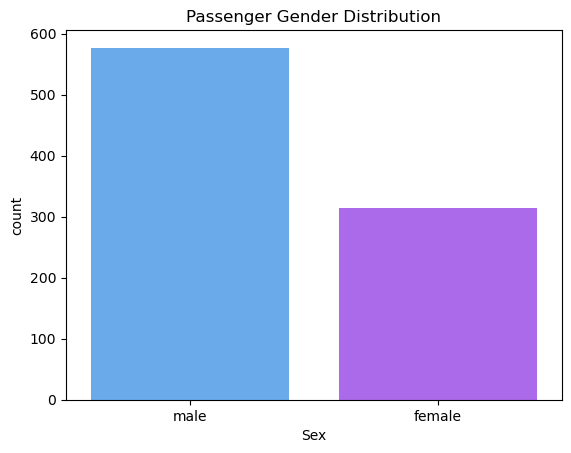

In [92]:
sns.countplot(x='Sex', data=df, palette='cool')
plt.title('Passenger Gender Distribution')
plt.show()

#### Task 4.3  Histogram for the age distribution.

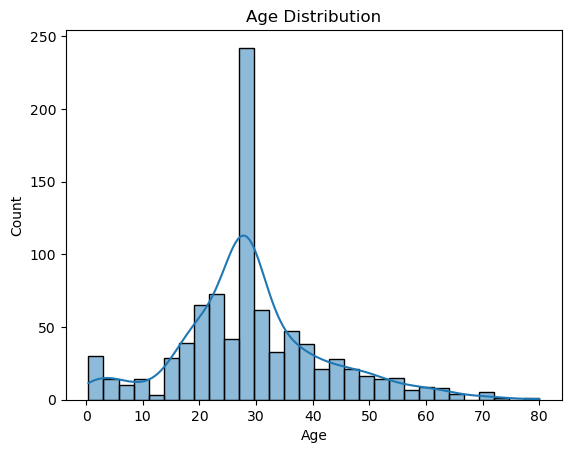

In [68]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

#### Task 4.4 Visualization of the survival rate by gender and class

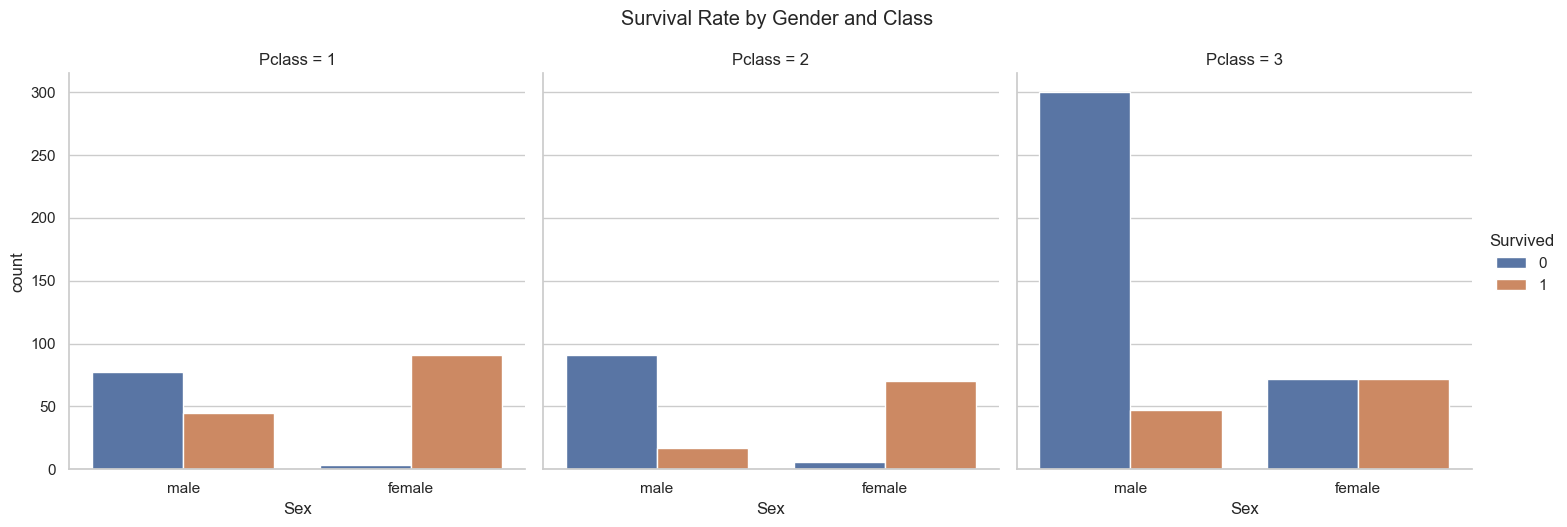

In [160]:
sns.catplot(x='Sex', hue='Survived', col='Pclass', data=df, kind='count')
plt.suptitle('Survival Rate by Gender and Class', y=1.05)
plt.show()

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Task 4.5 Extra Visualization 

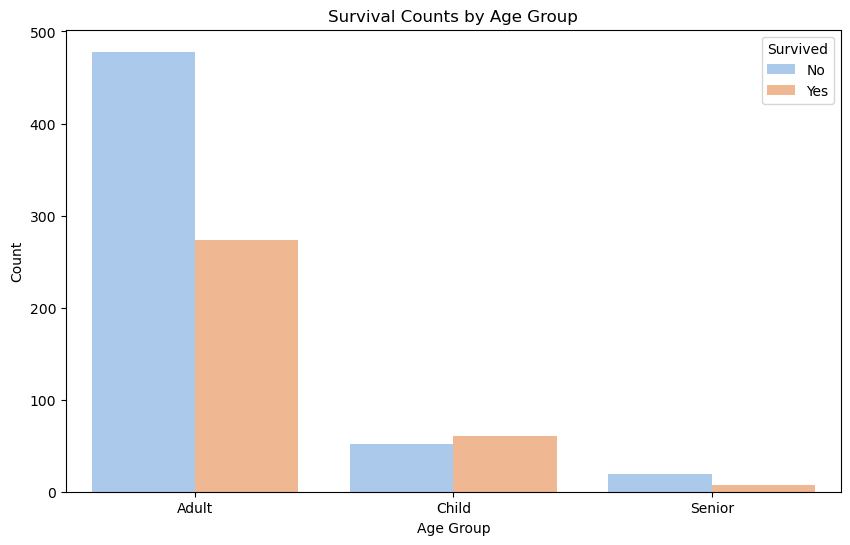

In [88]:
# Count plot for survival by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='pastel')
plt.title('Survival Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

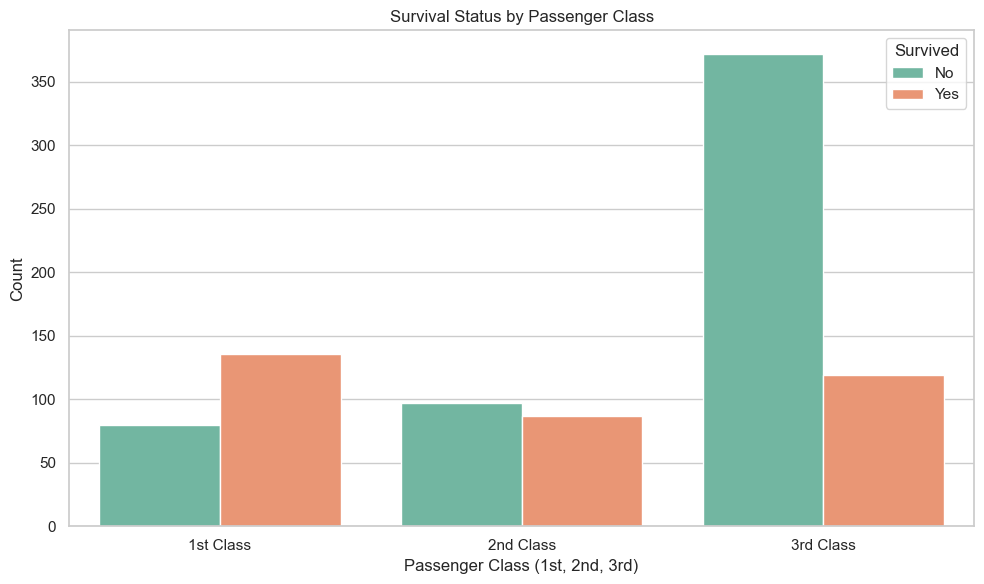

In [186]:
# Create a count plot for Passenger Class and Survival Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Status by Passenger Class')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])

# Show the plot
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

## Task 5  Basic Statistical Analysis

#### Task 5.1 Mean, Median, and Mode for the 'Fare' and 'Age' columns

In [94]:
# Mean, median, and mode for Fare and Age
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
fare_mode = df['Fare'].mode()[0]

age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]

print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Mode: {fare_mode}")
print(f"Age - Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}")

Fare - Mean: 32.204207968574636, Median: 14.4542, Mode: 8.05
Age - Mean: 29.36158249158249, Median: 28.0, Mode: 28.0


#### Task 5.2 t-test for survival rate based on gender

In [171]:
from scipy.stats import ttest_ind
# Dividing the dataset by gender
male_survived = df[df['Sex'] == 'male']['Survived']
female_survived = df[df['Sex'] == 'female']['Survived']

# Performing t-test
t_stat, p_value = ttest_ind(male_survived, female_survived)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -19.297816550123354, P-Value: 1.4060661308802594e-69


#### Task 5.3 Extra Analysis

In [173]:
# Chi-Square Test for Independence between Passenger Class and Survival 
from scipy.stats import chi2_contingency

# Create a contingency table for Pclass and Survived
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies Table:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [175]:
# Correlation Analysis between Fare and Survived
correlation = df['Fare'].corr(df['Survived'])
print(f"Correlation between Fare and Survived: {correlation}")

Correlation between Fare and Survived: 0.2573065223849623


## Miscellaneous

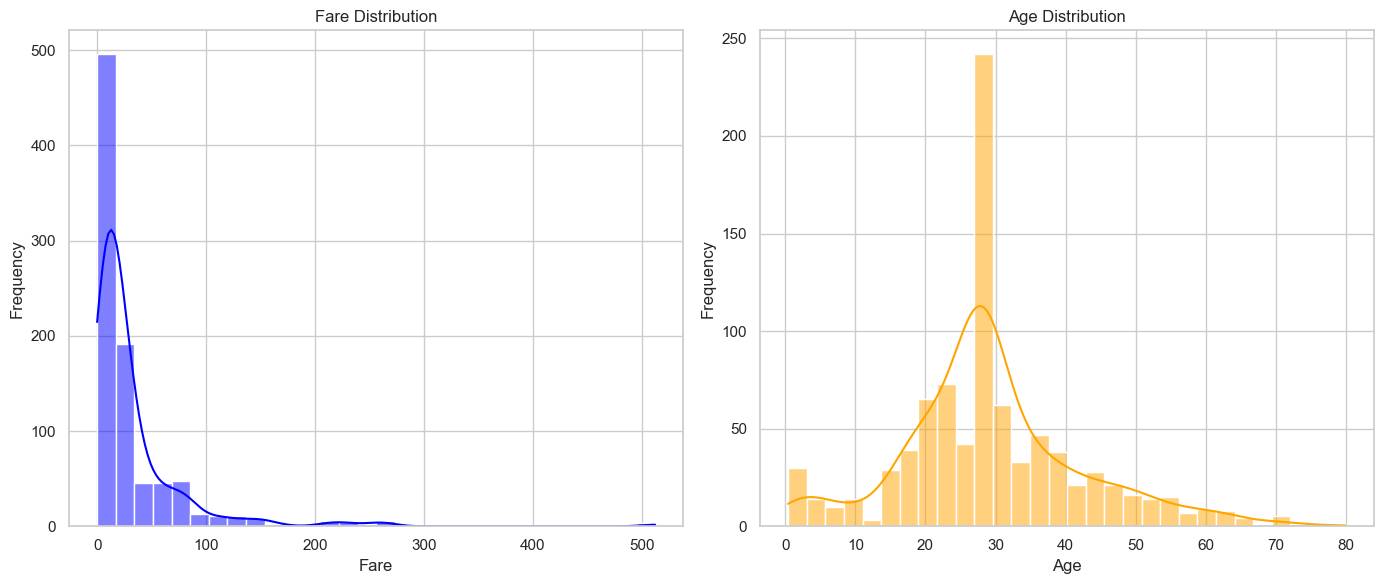

In [141]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots: one for the fare and one for the age distribution
plt.figure(figsize=(14, 6))

# Histogram of Fare
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.histplot(df['Fare'], bins=30, kde=True, color='blue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Histogram of Age
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

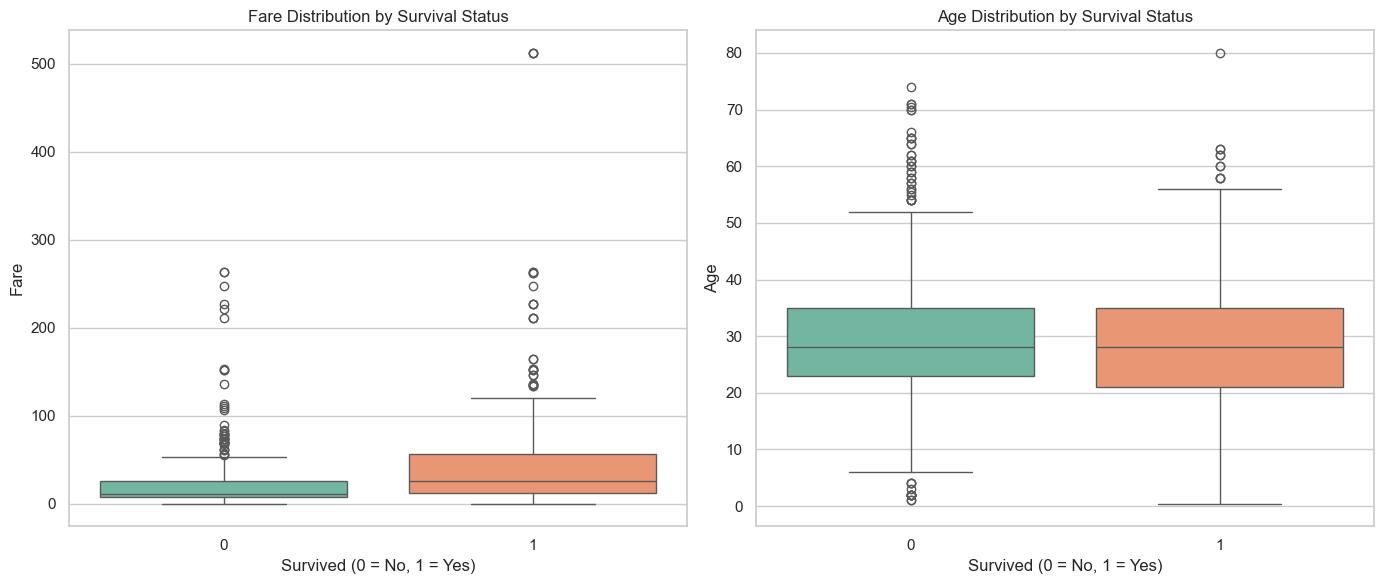

In [143]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Box Plot for Fare Distribution Against Survival
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')

# Box Plot for Age Distribution Against Survival
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')

# Show the plots
plt.tight_layout()
plt.show()

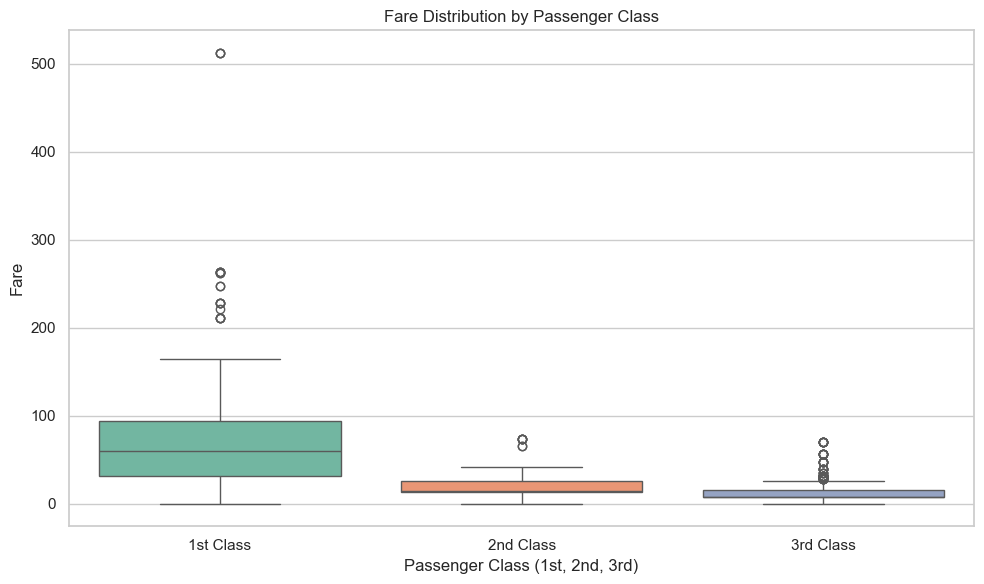

In [145]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a box plot for Fare distribution against Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.ylabel('Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])  # Optional: Customize x-tick labels

# Show the plot
plt.tight_layout()
plt.show()

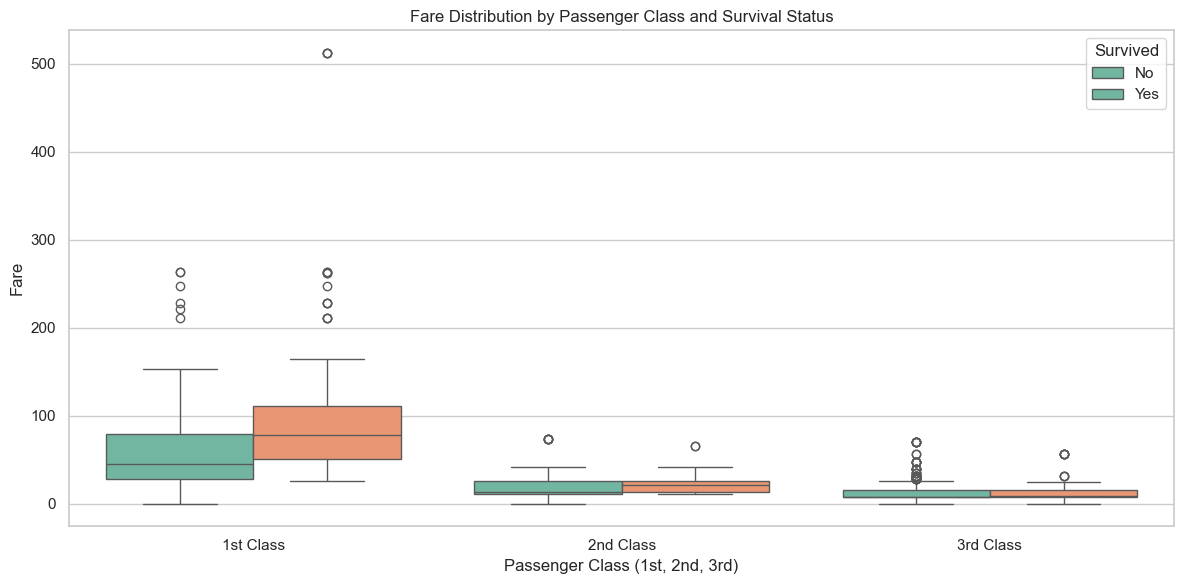

In [149]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a box plot for Fare distribution against Pclass and Survival
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set2')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.ylabel('Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])  # Optional: Customize x-tick labels

# Show the plot
plt.tight_layout()
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()